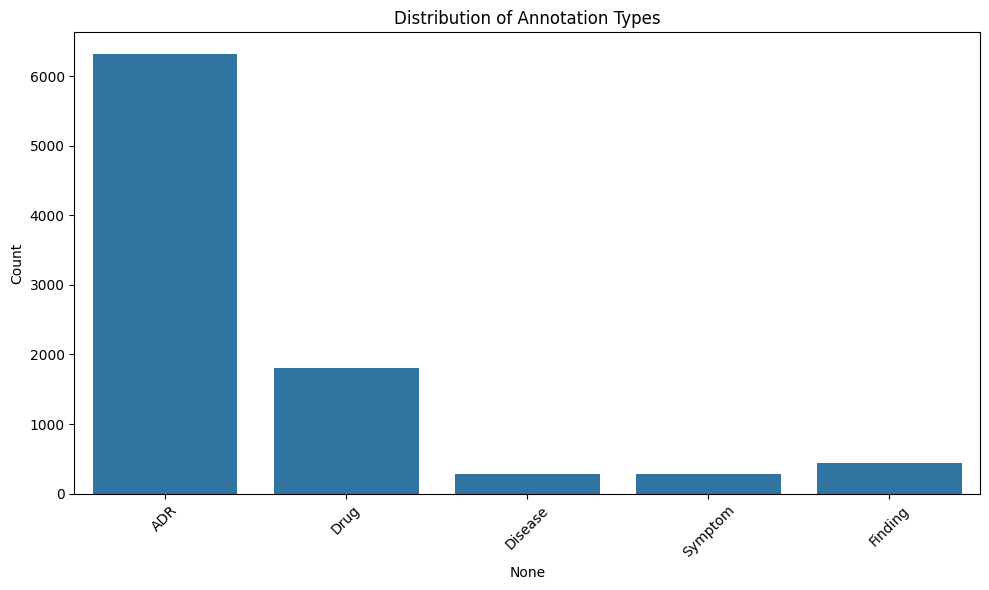

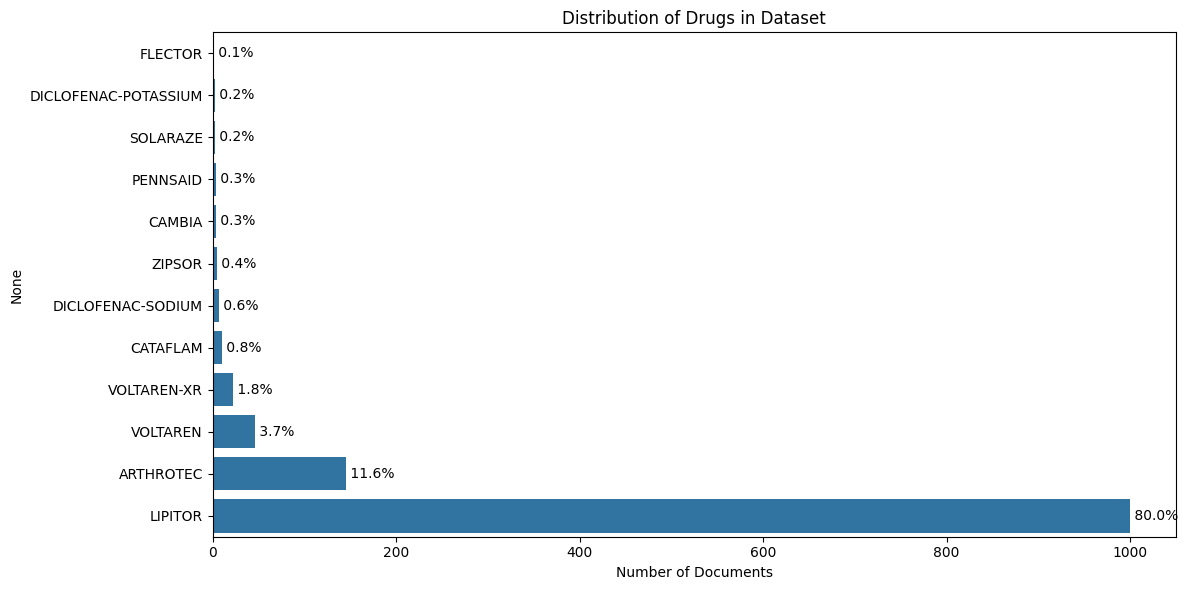

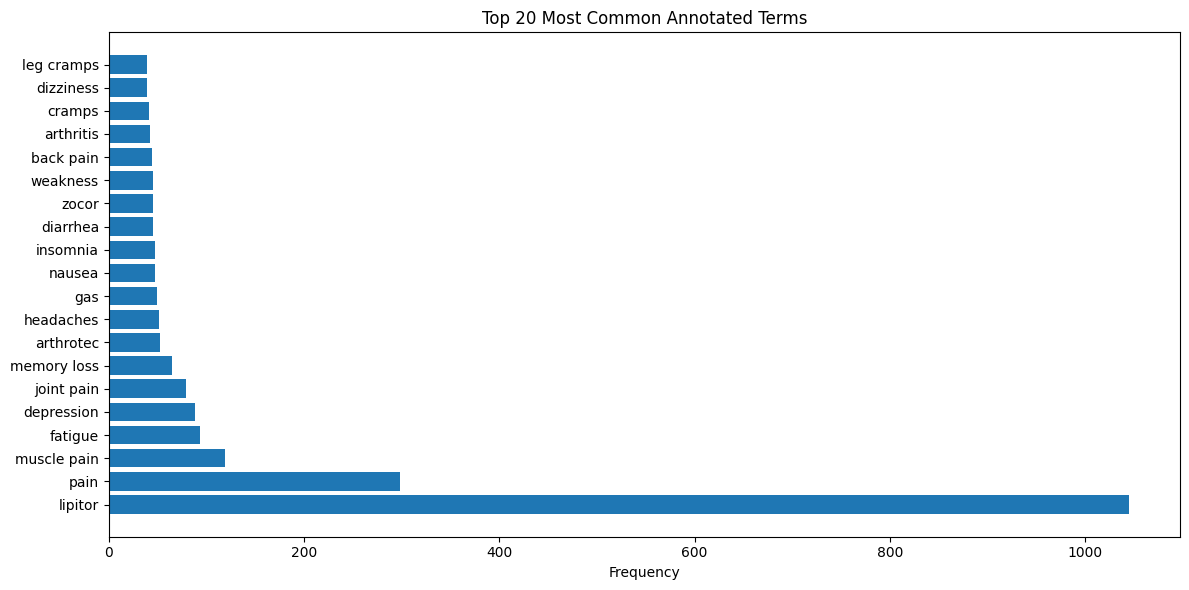

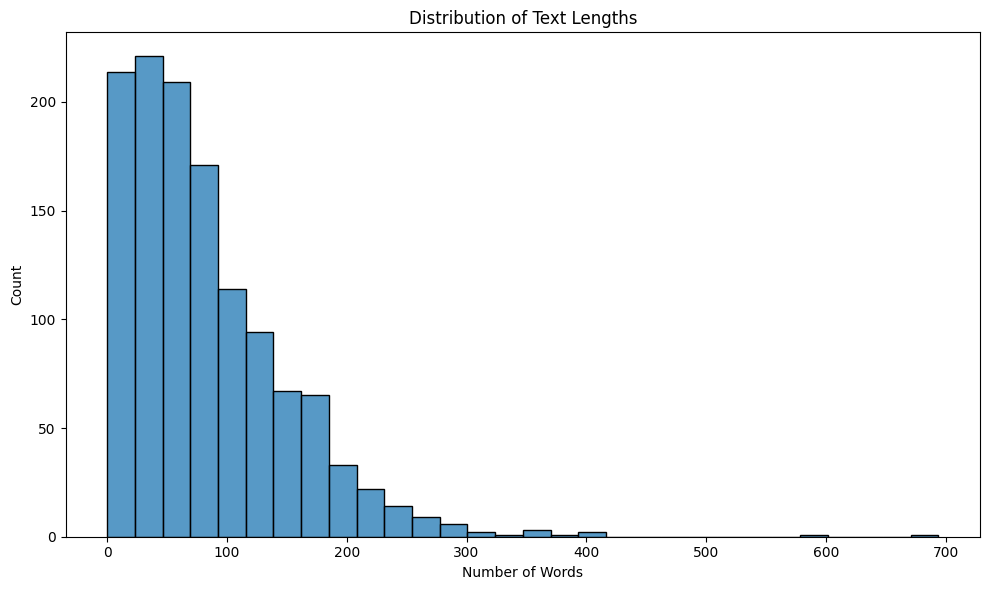

=== CADEC Dataset Analysis ===

Total number of documents: 1250
Total number of annotations: 9111

Drug distribution:
LIPITOR: 1000 documents (80.0%)
ARTHROTEC: 145 documents (11.6%)
VOLTAREN: 46 documents (3.7%)
VOLTAREN-XR: 22 documents (1.8%)
CATAFLAM: 10 documents (0.8%)
DICLOFENAC-SODIUM: 7 documents (0.6%)
ZIPSOR: 5 documents (0.4%)
CAMBIA: 4 documents (0.3%)
PENNSAID: 4 documents (0.3%)
DICLOFENAC-POTASSIUM: 3 documents (0.2%)
SOLARAZE: 3 documents (0.2%)
FLECTOR: 1 documents (0.1%)

Annotation types distribution:
ADR: 6318
Drug: 1800
Finding: 435
Disease: 283
Symptom: 275

Top 20 most common annotated terms:
lipitor: 1045
pain: 298
muscle pain: 119
fatigue: 93
depression: 88
joint pain: 79
memory loss: 65
arthrotec: 53
headaches: 51
gas: 49
nausea: 47
insomnia: 47
diarrhea: 45
zocor: 45
weakness: 45
back pain: 44
arthritis: 42
cramps: 41
dizziness: 39
leg cramps: 39


In [9]:
import os
import glob
from collections import defaultdict, Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return f.read().strip()

def read_annotation_file(file_path):
    annotations = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if line.startswith('T'):  # Only process entity annotations
                parts = line.strip().split('\t')
                if len(parts) >= 3:
                    tag_id, tag_info, text = parts
                    tag_type = tag_info.split()[0]
                    annotations.append({
                        'id': tag_id,
                        'type': tag_type,
                        'text': text
                    })
    return annotations

def plot_annotation_distribution(annotation_types):
    plt.figure(figsize=(10, 6))
    df = pd.DataFrame.from_dict(annotation_types, orient='index', columns=['count'])
    sns.barplot(x=df.index, y='count', data=df)
    plt.title('Distribution of Annotation Types')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def plot_drug_distribution(drugs, total_documents):
    plt.figure(figsize=(12, 6))
    df = pd.DataFrame.from_dict(drugs, orient='index', columns=['count'])
    df['percentage'] = df['count'] / total_documents * 100
    df = df.sort_values('count', ascending=True)
    
    sns.barplot(x='count', y=df.index, data=df)
    plt.title('Distribution of Drugs in Dataset')
    plt.xlabel('Number of Documents')
    
    # Add percentage labels
    for i, v in enumerate(df['count']):
        plt.text(v, i, f' {df["percentage"].iloc[i]:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()

def plot_common_terms(annotation_texts, top_n=20):
    plt.figure(figsize=(12, 6))
    items = sorted(annotation_texts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    terms, counts = zip(*items)
    
    y_pos = np.arange(len(terms))
    plt.barh(y_pos, counts)
    plt.yticks(y_pos, terms)
    plt.xlabel('Frequency')
    plt.title(f'Top {top_n} Most Common Annotated Terms')
    plt.tight_layout()
    plt.show()

def plot_text_lengths(text_path):
    lengths = []
    for text_file in glob.glob(os.path.join(text_path, '*.txt')):
        text = read_text_file(text_file)
        lengths.append(len(text.split()))
    
    plt.figure(figsize=(10, 6))
    sns.histplot(lengths, bins=30)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def analyze_cadec_dataset():
    # Set style for all plots
    plt.style.use('default')

    
    # Paths
    base_path = 'CADEC.v2/cadec'
    text_path = os.path.join(base_path, 'text')
    ann_path = os.path.join(base_path, 'original')
    
    # Analysis variables
    total_documents = 0
    total_annotations = 0
    annotation_types = Counter()
    drugs = defaultdict(int)
    annotation_texts = defaultdict(int)
    
    # Process each text file
    for text_file in glob.glob(os.path.join(text_path, '*.txt')):
        total_documents += 1
        
        # Get corresponding annotation file
        base_name = os.path.basename(text_file)
        ann_file = os.path.join(ann_path, base_name.replace('.txt', '.ann'))
        
        # Extract drug name from filename
        drug_name = base_name.split('.')[0]
        drugs[drug_name] += 1
        
        # Read annotations
        if os.path.exists(ann_file):
            annotations = read_annotation_file(ann_file)
            total_annotations += len(annotations)
            
            # Count annotation types and texts
            for ann in annotations:
                annotation_types[ann['type']] += 1
                annotation_texts[ann['text'].lower()] += 1
    
    # Generate visualizations
    plot_annotation_distribution(annotation_types)
    plot_drug_distribution(drugs, total_documents)
    plot_common_terms(annotation_texts)
    plot_text_lengths(text_path)
    
    # Print analysis results
    print("=== CADEC Dataset Analysis ===")
    print(f"\nTotal number of documents: {total_documents}")
    print(f"Total number of annotations: {total_annotations}")
    
    print("\nDrug distribution:")
    for drug, count in sorted(drugs.items(), key=lambda x: x[1], reverse=True):
        percentage = (count / total_documents) * 100
        print(f"{drug}: {count} documents ({percentage:.1f}%)")
    
    print("\nAnnotation types distribution:")
    for ann_type, count in annotation_types.most_common():
        print(f"{ann_type}: {count}")
    
    print("\nTop 20 most common annotated terms:")
    for text, count in sorted(annotation_texts.items(), key=lambda x: x[1], reverse=True)[:20]:
        print(f"{text}: {count}")

if __name__ == "__main__":
    analyze_cadec_dataset() 